In [1]:
# the hypothesis of Logistic Regression
# based on the Sigmoid func or called logistic fun: g(z) = 1/(1+exp(-z))
# where z = hθ(x)
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt

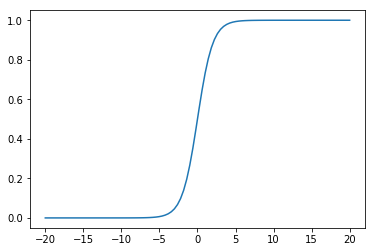

In [2]:
# plot the sigmoid fun:
z = np.linspace(-20,20,100)
g = 1/(1+np.exp(-z)) # the probability P(y = 1 | x; θ)
plt.plot(z,g)
plt.show()

(100, 2)
(100,)


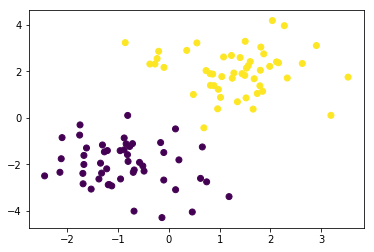

In [3]:
# generate the classification data: Binary Problem (0 or 1)
from sklearn.datasets import make_blobs

data1, label1 = make_blobs(n_samples = 100, centers = [[-1,-2],[1,2]], n_features = 2, random_state = 1)
print(data1.shape)
print(label1.shape)
plt.scatter(data1[:,0],data1[:,1], c = label1)
plt.show()

In [4]:
# define the cost fun which is really different from linear regression:

def cosfun(θ0, θ1, θ2,X,y):
    θ = np.array([θ0, θ1, θ2])
    X = np.concatenate((np.ones((len(X),1)),X), axis = 1) # X is 100 X 3 array
    y = y.reshape(len(X),1) # now y becomes 100 X 1 array
    h = 1/(1+np.exp(-X*(θ.T))) # the hypothesis, instead of h = X*(θ.T)
    return -1/len(X)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))

89
[θ0, θ1, θ2] = [0.33849894 1.49128059 1.55431532]


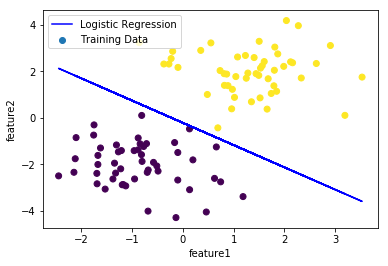

In [5]:
# Gradient Descent
θ0, θ1, θ2 = 1,1,1
δθ = 0.001
α = 0.05
n_step = 5000
X = data1
y = label1
count = 0
result = []

for i in range(n_step):
    
    J_before = cosfun(θ0, θ1, θ2,X,y)
    J_p0 = cosfun(θ0+δθ, θ1, θ2,X,y)
    J_p1 = cosfun(θ0, θ1+δθ, θ2,X,y)
    J_p2 = cosfun(θ0, θ1, θ2+δθ,X,y)
    
    θ0 += -α*(J_p0-J_before)/δθ # simultaneously update all θ
    θ1 += -α*(J_p1-J_before)/δθ # simultaneously update all θ
    θ2 += -α*(J_p2-J_before)/δθ # simultaneously update all θ
    J_after = cosfun(θ0, θ1, θ2,X,y)
    count += 1
    if np.abs(J_after-J_before) < 0.001: 
        result += [θ0, θ1, θ2]
        result = np.array(result)
        break

print(count)
print('[θ0, θ1, θ2] = {}'.format(result))
plt.scatter(data1[:,0], data1[:,1], c = label1, label = 'Training Data')
plt.plot(data1[:,0], (-θ0-θ1*data1[:,0])/θ2, c = 'b', label = 'Logistic Regression')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.show()

In [7]:
# let's predict the prob of a new sample [0,4]
NewData1 = np.array([1,0,4])
prob = 1/(1+np.exp(-np.dot(NewData1,result)))
print(prob, '%')

0.9985801174104068 %
